# <center><h1 style="color:'blue';background-color:cyan"> Crop Production Analysis in India</h1></center>

<h1 style="color:magenta">By : Shalini Pal</h1>

Importing Relevant libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Importing the dataset

In [4]:
data = pd.read_csv("Crop Production data.csv")

In [5]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [6]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [7]:
mean_production = data['Production'].mean()
data['Production'].fillna(mean_production, inplace=True)

In [8]:
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [9]:
data.isna().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.460910e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.693599e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,9.100000e+01
50%,2006.000000,5.820000e+02,7.880000e+02
75%,2010.000000,4.392000e+03,8.000000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [13]:
# Getting only numeric columns from the dataset.
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data_numeric = data[numeric_columns]
data_numeric.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.460910e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.693599e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,9.100000e+01
50%,2006.000000,5.820000e+02,7.880000e+02
75%,2010.000000,4.392000e+03,8.000000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [14]:
print(f"Number of States : {data['State_Name'].nunique()}\n")
print(f"List of states name :\n {data['State_Name'].unique()}")

Number of States : 33

List of states name :
 ['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [15]:
print(f"Number of Districts : {data['District_Name'].nunique()}\n")
print(f"List of District names :\n {data['District_Name'].unique()}")

Number of Districts : 646

List of District names :
 ['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG' 'BAKSA' 'BARPETA'
 'BONGAIGAON' 'CACHAR' 'CHIRANG' 'DARRANG' 'DHEMAJI' 'DHUBRI' 'DIBRUGARH'
 'DIMA HASAO' 'GOALPARA' 'GOLAGHAT' 'HAILAKANDI' 'JORHAT' 'KAMRUP'
 'KAMRUP METRO' 'KARBI ANGLONG' 'KARIMGANJ' 'KOKRAJHAR' 'LAKHIMPUR'
 'MARIGAON' 'NAGAON' 'NALBARI' 'SIVASAGAR' 'SONITPUR' 'TINSUKIA'
 'UDALGURI' 'ARARIA' 'ARWAL' 'AURANGABAD' 'BANKA' 'BEGUSARAI' 'BHAGALPUR'
 'BHOJPUR' 'BUXAR' 'DARBHANGA' 'GAYA' 'GOPALGANJ' 'JAMUI' 'JEHANABAD'
 'KAIMUR (BHABUA)' 'KATIHAR' 'KHAGARIA' 'KISHANGAN

In [16]:
print("Years :     ",data['Crop_Year'].unique())
print("Start year :",data['Crop_Year'].min())
print("End year :  ",data['Crop_Year'].max())

Years :      [2000 2001 2002 2003 2004 2005 2006 2010 1997 1998 1999 2007 2008 2009
 2011 2012 2013 2014 2015]
Start year : 1997
End year :   2015


In [17]:
print(f"Number of Seasons: {data['Season'].nunique()}")
print("Seasons List :    \n",data['Season'].unique())

Number of Seasons: 6
Seasons List :    
 ['Kharif     ' 'Whole Year ' 'Autumn     ' 'Rabi       ' 'Summer     '
 'Winter     ']


In [18]:
print(f"Types of Crops : {data['Crop'].nunique()}")
print(f"List of Crops :{data['Crop'].unique()}")

Types of Crops : 124
List of Crops :['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy'
 'Pineapple' 'B

In [19]:
print(f"Smallest Area Covered :{data['Area'].min()}")
print(f"Largest Area Covered : {data['Area'].max()}")

print(f"\nSmallest Produce :{data['Production'].min()} tonnes")
print(f"Largest Produce :{data['Production'].max()} tonnes")

Smallest Area Covered :0.04
Largest Area Covered : 8580100.0

Smallest Produce :0.0 tonnes
Largest Produce :1250800000.0 tonnes


<Axes: >

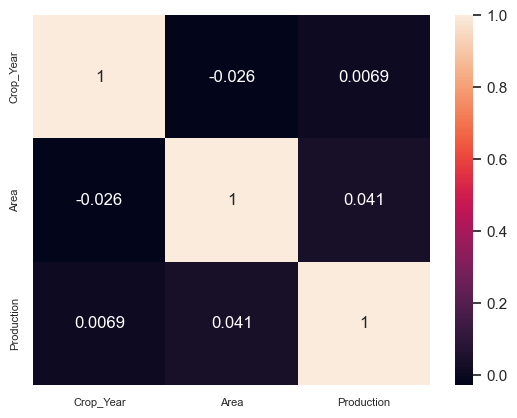

In [20]:
plt.tick_params(labelsize=8)
sns.heatmap(data_numeric.corr(),annot=True)

Observation : There is <b>no strong relationship</b> between any variables in the dataset

In [21]:
data.shape

(246091, 7)

# Further Categorizing the Data by adding few more columns

In [22]:
data['Yield'] = data['Production']/data['Area']

In [23]:
data.head(2)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000


# Categorizing states further according to their zones for better insights and visual

In [24]:
north = ['Uttar Pradesh','Uttarakhand','Haryana','Jammu and Kashmir','Himachal Pradesh','Punjab']
south = ['Andhra Pradesh','Tamil Nadu','Karnataka','Kerala','Telangana']
east = ['Jharkhand','Bihar','Odisha','West Bengal']
west = ['Goa','Rajasthan','Gujarat','Maharashtra']
north_east = ['Manipur','Mizoram','Nagaland','Arunachal Pradesh','Meghalaya','Assam','Tripura','Sikkim']
central = ['Chhattisgarh','Madhya Pradesh']
union_territory = ['Dadra and Nagar Haveli','Chandigarh','Puducherry','Andaman and Nicobar Islands']

In [25]:
def get_zone(df):
    if df['State_Name'].strip() in north:
        zone = 'North'
    elif df['State_Name'].strip() in south:
        zone = 'South'
    elif df['State_Name'].strip() in east:
        zone = 'East'
    elif df['State_Name'].strip() in west:
        zone = 'West'
    elif df['State_Name'].strip() in north_east:
        zone = 'North East'
    elif df['State_Name'].strip() in central:
        zone = 'Central'
    else:
        zone = 'Union Territory'
    return zone

data['Zone'] = data.apply(get_zone,axis=1)

In [26]:
data['Zone'].value_counts()

Zone
South              54207
North              51378
East               43339
West               33786
Central            33652
North East         28297
Union Territory     1432
Name: count, dtype: int64

In [27]:
cereals =['Jobster','Other Cereals & Millets','Rice','Maize','Bajra','Jowar','Korra','Ragi','Wheat','Barley','Varagu','Paddy','Total foodgrain']
pulses = ['Rajmash Kholar','Ricebean (nagadal)','Khesari','Blackgram','Other Kharif pulses','Moong(Green Gram)','Urad','Lentil','Bean','Arhar/Tur','Horse-gram','Gram','Masoor','other misc. pulses','Samai','Small millets','Other  Rabi pulses','Pulses total','Peas & beans (Pulses)']
oil_seeds = ['other oilseeds','Groundnut','Sunflower','Castor seed','Sesamum','Linseed','Safflower','Soyabean','Rapeseed &Mustard','Niger seed','Oilseeds total']
fiber_crops = ['Sannhamp','Jute & mesta','Moth','Cotton(lint)','other fibres','Mesta','Jute','Kapas']
cash_crops = ['Arecanut','Cashewnut','Coconut','Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw']
spices =['Cardamom','Cond-spcs other','Dry ginger','Black pepper','Dry chillies','Turmeric',]
fruits = ['Other Dry Fruit','Apple','Peach','Pear','Plums','Litchi','Ber','Other Citrus Fruit','Water Melon','Pineapple','Banana','Citrus Fruit', 'Grapes','Mango','Orange','Other Fresh Fruits','Papaya','Pome Fruit','Pome Granet','Sapota']
vegetables = ['Cowpea(Lobia)','Yam','Ribed Guard','Lab-Lab','Ash Gourd','Beet Root','Perilla','Colocosia','Cauliflower','Bitter Gourd','Drum Stick','Jack Fruit','Snak Guard','Turnip','Carrot','Redish','Guar seed','Sweet potato','Tapioca','Onion','Coriander','Potato','Beans & Mutter(Vegetable)','Bhindi','Brinjal','Cucumber','Other Vegetables','Tomato','Lemon','Cabbage','Peas  (vegetable)','Bottle Gourd','Garlic','Ginger','Pump Kin']
beverages = ['Tea','Coffee']
speciality_crops = ['Sugarcane','Tobacco']
others = ['Rubber']

In [28]:
def get_crop_type(df):
    if df['Crop'].strip() in cereals:
        crop = 'Cereal'
    elif df['Crop'].strip() in pulses:
        crop = 'Pulse'
    elif df['Crop'].strip() in oil_seeds:
        crop = 'Oil Seed'
    elif df['Crop'].strip() in fiber_crops:
        crop = 'Fiber Crop'
    elif df['Crop'].strip() in cash_crops:
        crop = 'Cash Crop'
    elif df['Crop'].strip() in spices:
        crop = 'Spice'
    elif df['Crop'].strip() in fruits:
        crop = 'Fruit'
    elif df['Crop'].strip() in vegetables:
        crop = 'Vegetable'
    elif df['Crop'].strip() in beverages:
        crop = 'Beverage'
    elif df['Crop'].strip() in speciality_crops:
        crop = 'Speciality Crop'
    else:
        crop = 'Other'
    return crop

data['Crop_Type'] = data.apply(get_crop_type,axis=1)

# Visualizing Data

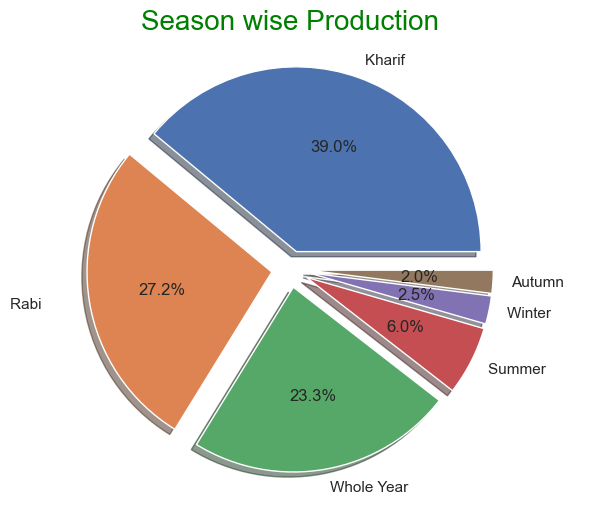

In [29]:
count = data['Season'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(count, labels=count.index, autopct='%1.1f%%',explode=[0.1,0.1,0.1,0.1,0.1,0.1],shadow = True)

plt.title('Season wise Production',fontsize=20,color='green')
plt.show()

In [30]:
data['Crop_Type'].value_counts()

Crop_Type
Pulse              61228
Cereal             59274
Oil Seed           46500
Vegetable          31390
Spice              15078
Fiber Crop         11073
Speciality Crop    10619
Fruit               6093
Cash Crop           4739
Beverage              68
Other                 29
Name: count, dtype: int64

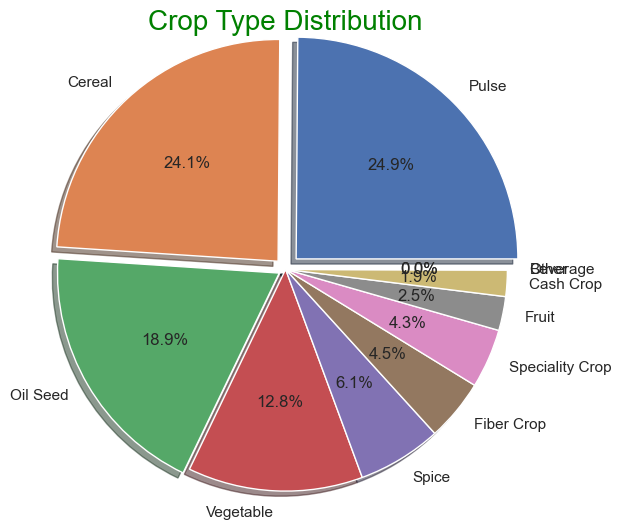

In [31]:
count = data['Crop_Type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(count, labels=count.index, autopct='%1.1f%%',shadow = True,radius=1.2,explode=[0.08,0.06,0.04,0,0,0,0,0,0,0,0])

plt.title('Crop Type Distribution',fontsize=20,color='green')
plt.show()

In [32]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield,Zone,Crop_Type
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896,Union Territory,Cash Crop
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000,Union Territory,Pulse
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059,Union Territory,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045,Union Territory,Fruit
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167,Union Territory,Cash Crop


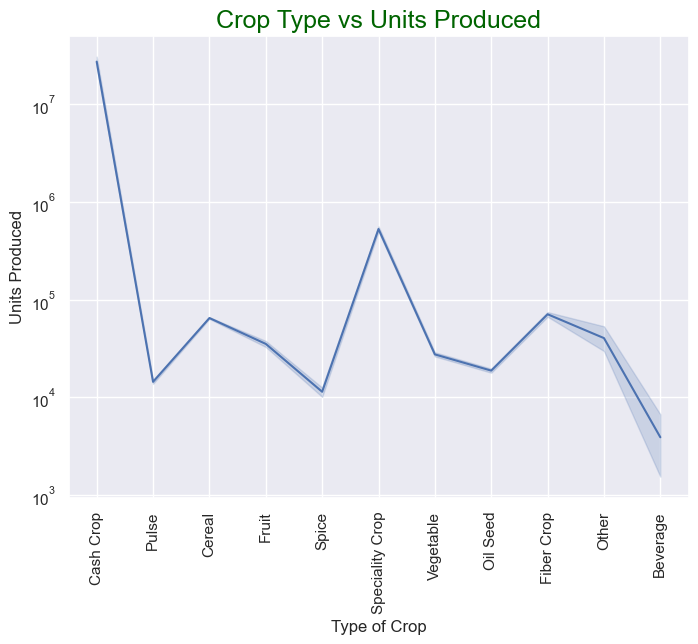

In [33]:
plt.figure(figsize=(8,6))
sns.lineplot(data, x='Crop_Type', y='Production')

plt.title('Crop Type vs Units Produced',color='darkgreen',fontsize=18)
plt.xlabel('Type of Crop')
plt.ylabel('Units Produced')
plt.xticks(rotation=90);
plt.yscale('log')
plt.show()

Obseravtion: Cash Crops are highly produced in India,followed by speciality crops

# Analyzing Production Zone wise

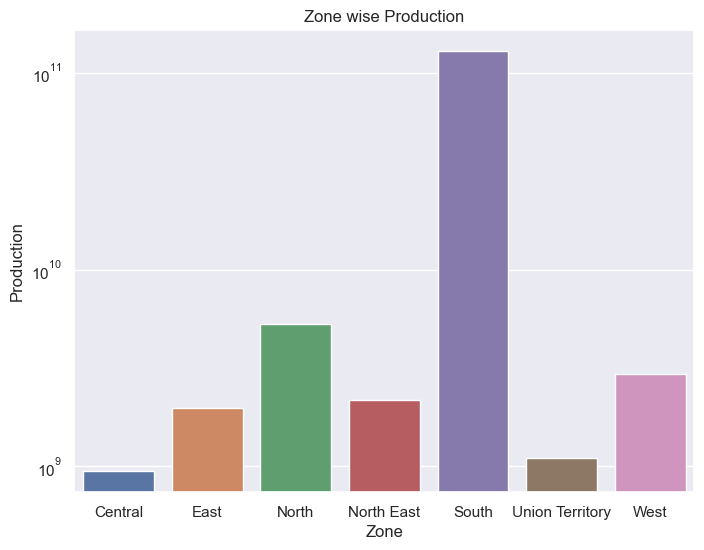

In [34]:
plt.figure(figsize=(8,6))
sns.barplot(data=data.groupby('Zone')['Production'].sum().reset_index(),x='Zone',y='Production',errwidth=0)
plt.title("Zone wise Production")
plt.yscale('log')
plt.show()

Observation : <b>South Zone</b> stands highest in production and <b>Union Territory</b> stands seconf highest<br>
Further Analyzing South Zone

In [35]:
south_data = data[data['Zone']=='South']
south_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield,Zone,Crop_Type
203,Andhra Pradesh,ANANTAPUR,1997,Kharif,Arhar/Tur,21400.0,2600.0,0.121495,South,Pulse
204,Andhra Pradesh,ANANTAPUR,1997,Kharif,Bajra,1400.0,500.0,0.357143,South,Cereal
205,Andhra Pradesh,ANANTAPUR,1997,Kharif,Castor seed,1000.0,100.0,0.100000,South,Oil Seed
206,Andhra Pradesh,ANANTAPUR,1997,Kharif,Cotton(lint),7300.0,9400.0,1.287671,South,Fiber Crop
207,Andhra Pradesh,ANANTAPUR,1997,Kharif,Dry chillies,3700.0,7100.0,1.918919,South,Spice


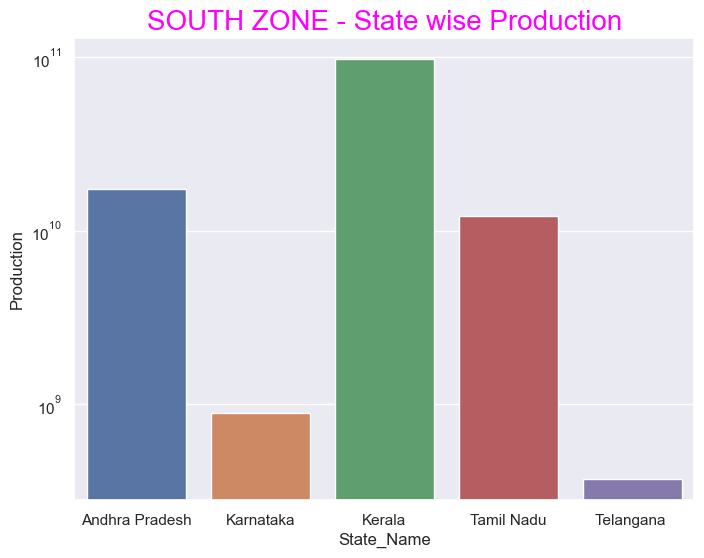

In [36]:
plt.figure(figsize=(8,6))
sns.barplot(south_data.groupby('State_Name')['Production'].sum().reset_index(),x='State_Name',y='Production',errwidth=0)
plt.yscale('log')
plt.title('SOUTH ZONE - State wise Production',fontsize=20,color='magenta')
plt.show()

Observation : <b>Kerela</b> is the state with highest production of crops,followed by Andhra Pradesh

In [89]:
crop_group = south_data.groupby('Crop')['Production'].sum().reset_index()

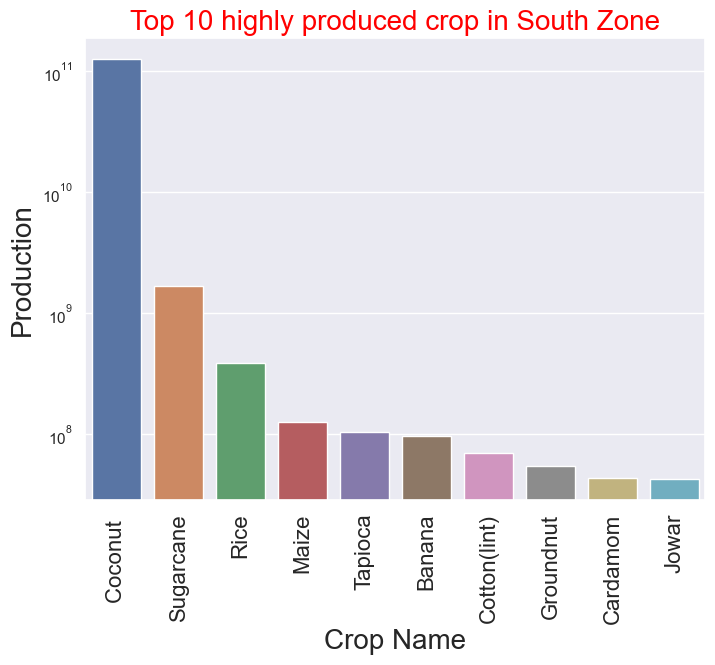

In [92]:
plt.figure(figsize=(8,6))
sns.barplot(data=crop_group.sort_values(by='Production',ascending=False).head(10),x='Crop',y='Production',errwidth=0)
plt.yscale('log')
plt.title("Top 10 highly produced crop in South Zone",fontsize=20,color='red')
plt.xlabel('Crop Name',fontsize=20)
plt.ylabel('Production',fontsize=20)
plt.xticks(rotation=90,fontsize=16)
plt.show()

Observation: <b>Coconut</b> is the largest producing crop in South Zone.

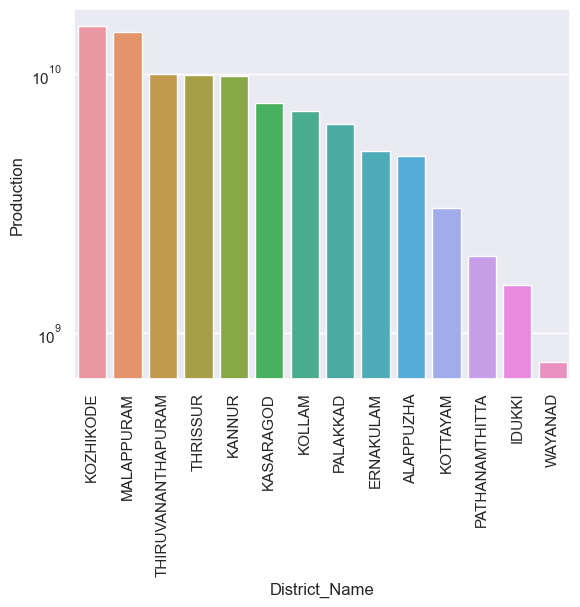

In [79]:

Kerala_District_Group = south_data[south_data['State_Name']=='Kerala'].groupby('District_Name')['Production'].sum().reset_index()

sns.barplot(Kerala_District_Group.sort_values(by='Production',ascending=False),x='District_Name',y='Production')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

Observation: <b>Kozhikode, Malappuram, Thiruvananthapuram </b> are the top 3 high producing District in Kerela

In [80]:
union_data = data[data['Zone']=='Union Territory']

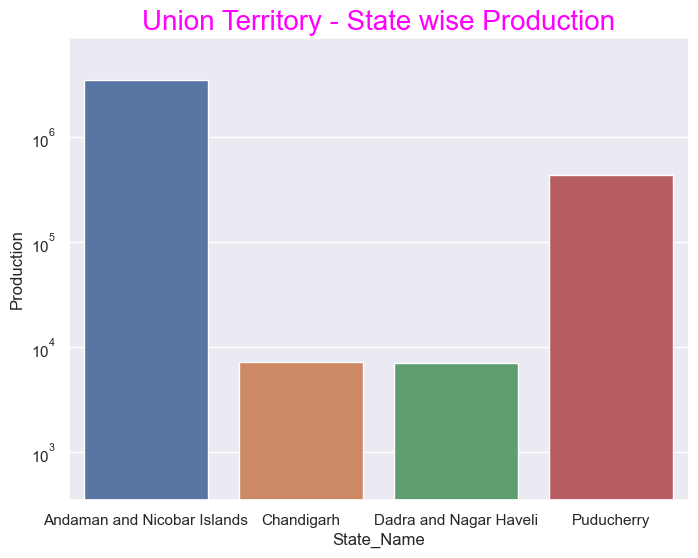

In [81]:
plt.figure(figsize=(8,6))
sns.barplot(x=union_data['State_Name'],y=union_data['Production'],errwidth=0)
plt.yscale('log')
plt.title('Union Territory - State wise Production',fontsize=20,color='magenta')
plt.show()

Observation: <b>Andaman and Nicobar Islands</b> have highest production in Union Territory,followed by <b>Puducherry</b>.

In [93]:
crop_group_ut = union_data.groupby('Crop')['Production'].sum().reset_index()

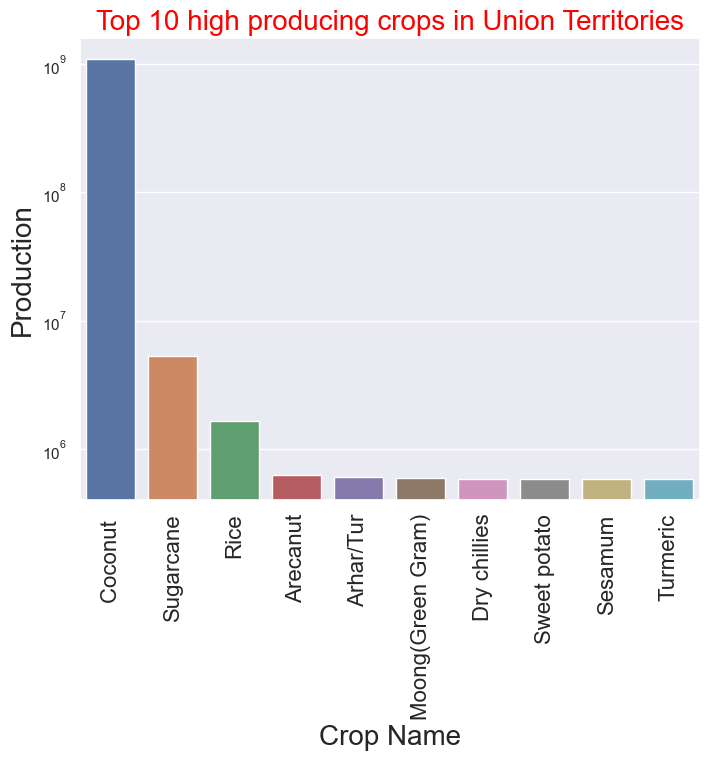

In [95]:
plt.figure(figsize=(8,6))
sns.barplot(data=crop_group_ut.sort_values(by='Production',ascending=False).head(10),x='Crop',y='Production',errwidth=0)
plt.yscale('log')
plt.title("Top 10 high producing crops in Union Territories",fontsize=20,color='red')
plt.xlabel('Crop Name',fontsize=20)
plt.ylabel('Production',fontsize=20)
plt.xticks(rotation=90,fontsize=16)
plt.show()

Observation: <b>Coconut</b> is the largest producing crop in Union Territory

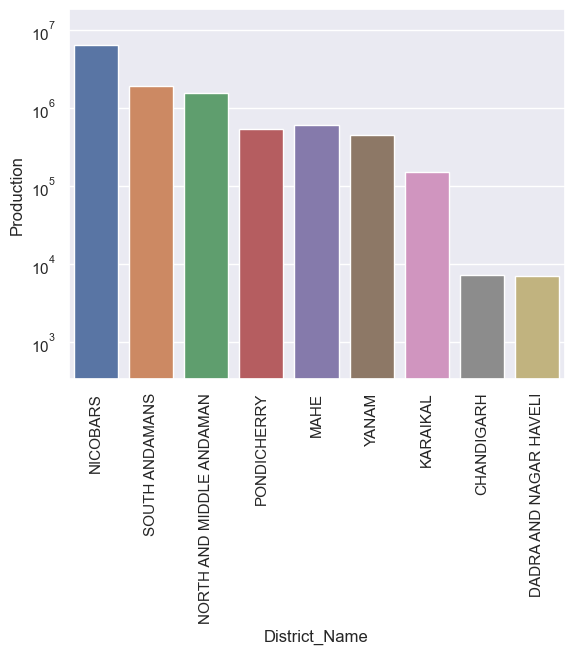

In [85]:
andaman_district_group = union_data[union_data['State_Name']=='Andaman and Nicobar Islands'].groupby('District_Name')['Production'].sum().reset_index()

sns.barplot(union_data.sort_values(by='Production',ascending=False),x='District_Name',y='Production',errwidth=0)
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

Observation : <b>Nicobars,South Andamans and North and Middle Andaman</b> are the top Districts in Andaman and Nicobar which have high Crop Production.

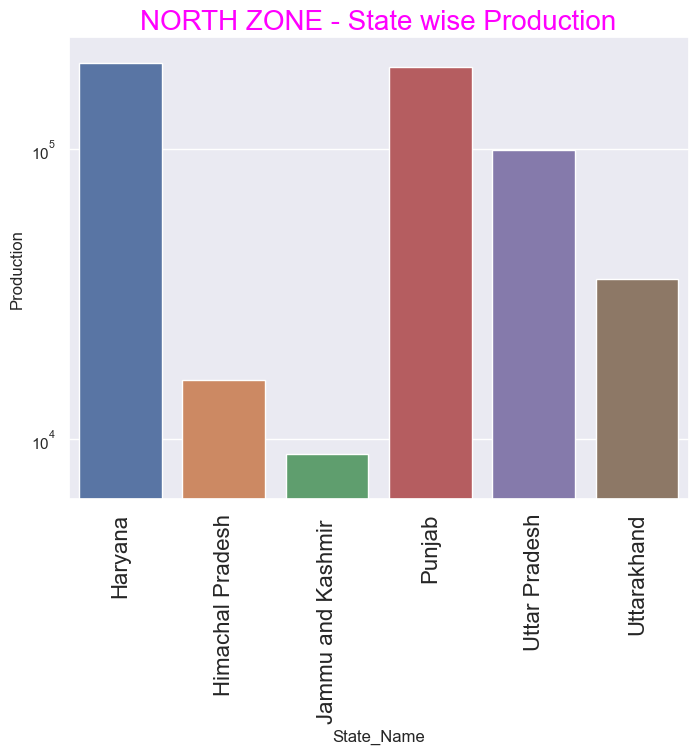

In [86]:

north_data = data[data['Zone']=='North']

plt.figure(figsize=(8,6))
sns.barplot(x=north_data['State_Name'],y=north_data['Production'],errwidth=0)
plt.yscale('log')
plt.xticks(rotation=90,fontsize=16)
plt.title('NORTH ZONE - State wise Production',fontsize=20,color='magenta')
plt.show()

Observation: <b>Haryana</b> and <b>Punjab</b> are the state that produce highest units of crops in North Zone.


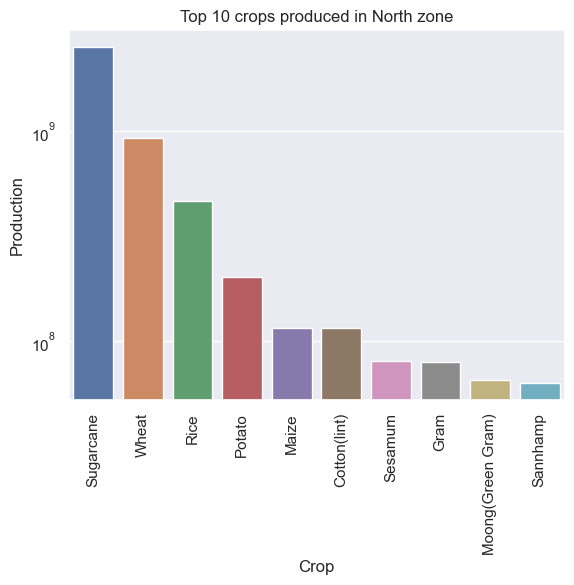

In [87]:
north_crop = north_data.groupby("Crop")["Production"].sum().reset_index().sort_values(by="Production",ascending=False).head(10)
sns.barplot(data=north_crop,x='Crop',y='Production')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Top 10 crops produced in North zone")
plt.show()

Observation : <b>Sugarcane, Wheat and Rice</b> are the top 3 crops produced in North Zone. 

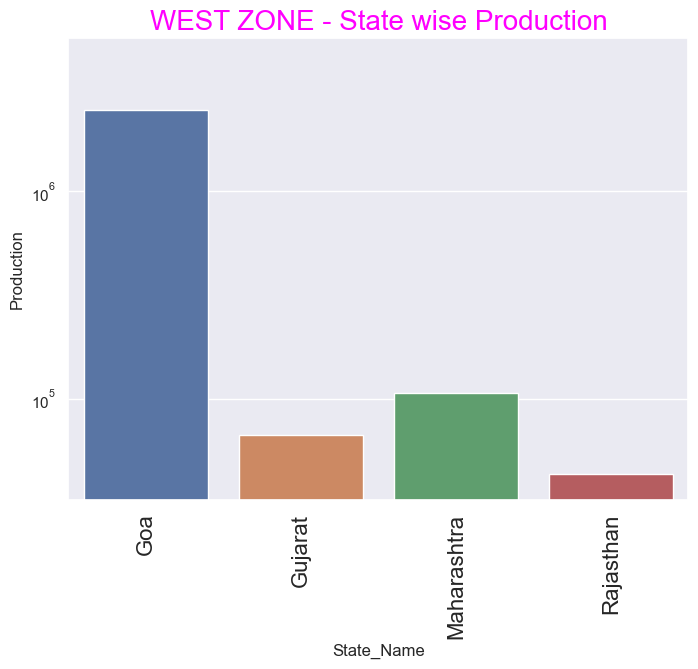

In [97]:
west_data = data[data['Zone']=='West']

plt.figure(figsize=(8,6))
sns.barplot(x=west_data['State_Name'],y=west_data['Production'],errwidth=0)
plt.yscale('log')
plt.xticks(rotation=90,fontsize=16)
plt.title('WEST ZONE - State wise Production',fontsize=20,color='magenta')
plt.show()

Observation: <b>Goa</b> produces highest unit of crops in West Zone.

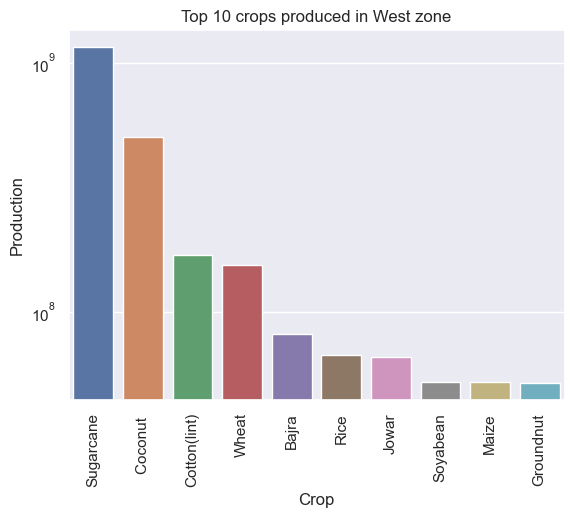

In [98]:
west_crop = west_data.groupby("Crop")["Production"].sum().reset_index().sort_values(by="Production",ascending=False).head(10)
sns.barplot(data=west_crop,x='Crop',y='Production')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Top 10 crops produced in West zone")
plt.show()

Observation :<b>Sugarcane</b> and <b>Coconut </b> are the crops that are highly produced in West Zone.

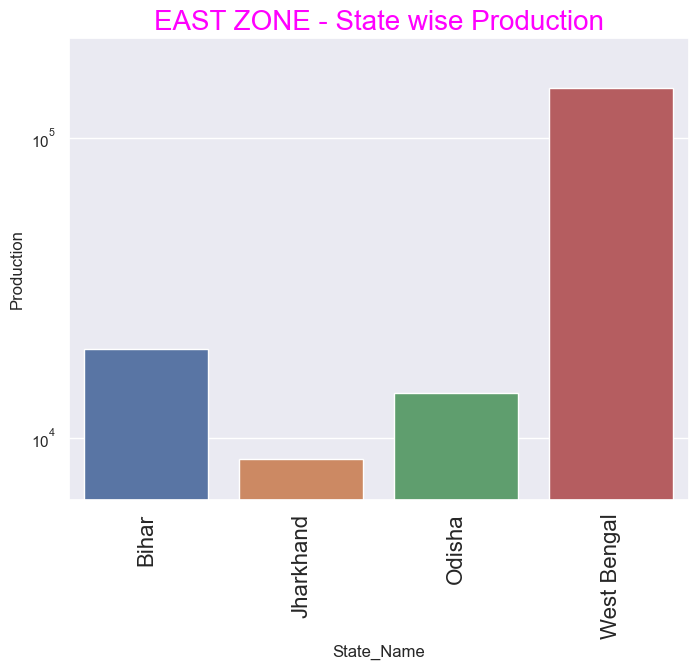

In [100]:
east_data = data[data['Zone']=='East']

plt.figure(figsize=(8,6))
sns.barplot(x=east_data['State_Name'],y=east_data['Production'],errwidth=0)
plt.yscale('log')
plt.xticks(rotation=90,fontsize=16)
plt.title('EAST ZONE - State wise Production',fontsize=20,color='magenta')
plt.show()

Observation: <b>West Bengal</b> produces highest unit of crops in East Zone.

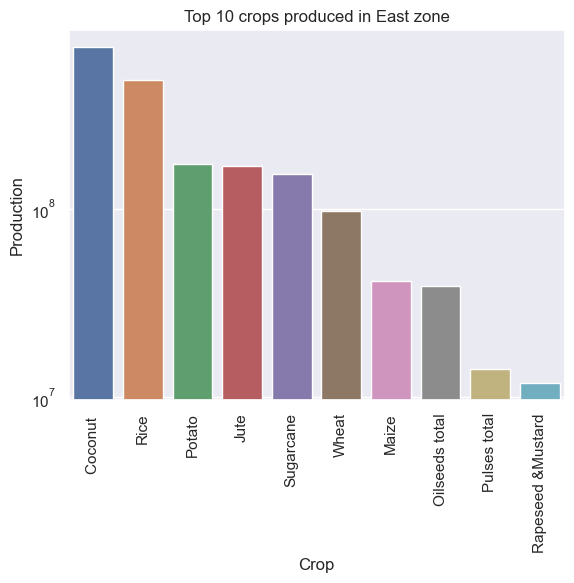

In [101]:
east_crop = east_data.groupby("Crop")["Production"].sum().reset_index().sort_values(by="Production",ascending=False).head(10)
sns.barplot(data=east_crop,x='Crop',y='Production')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Top 10 crops produced in East zone")
plt.show()

Observation : <b>Coconut</b> and <b>Rice</b> are the top crops produced in East Zone.

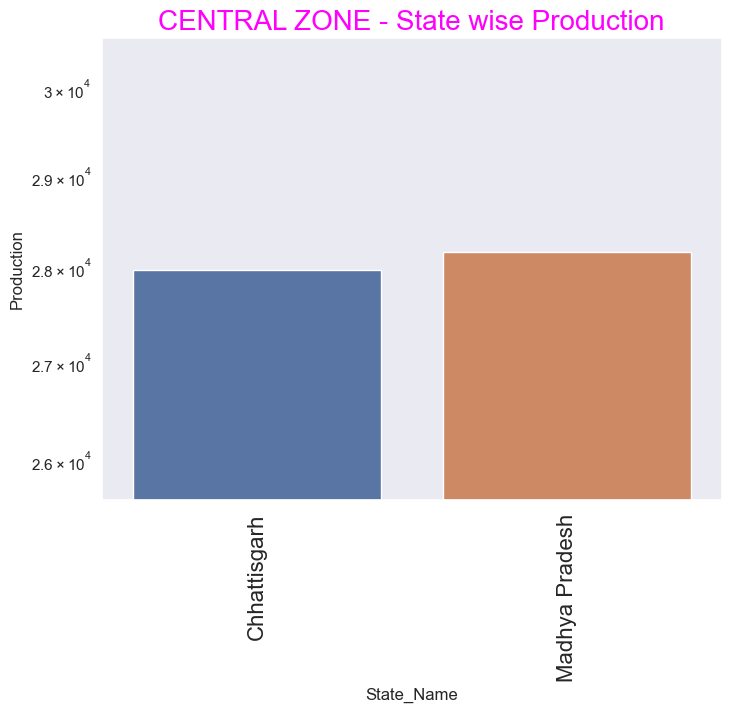

In [103]:
central_data = data[data['Zone']=='Central']

plt.figure(figsize=(8,6))
sns.barplot(x=central_data['State_Name'],y=central_data['Production'],errwidth=0)
plt.yscale('log')
plt.xticks(rotation=90,fontsize=16)
plt.title('CENTRAL ZONE - State wise Production',fontsize=20,color='magenta')
plt.show()

Observation: <b>Madhya Pradesh and Chhattisgarh</b> produce almost same amount of crops in Central Zone.

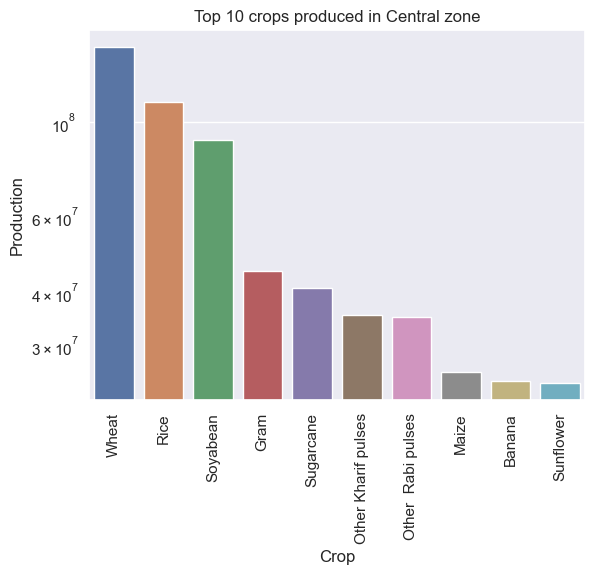

In [104]:
central_crop = central_data.groupby("Crop")["Production"].sum().reset_index().sort_values(by="Production",ascending=False).head(10)
sns.barplot(data=central_crop,x='Crop',y='Production')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Top 10 crops produced in Central zone")
plt.show()

Observation : <b>Wheat, Rice </b>and <b>Soyabean</b> are the top 3 crops produced in Central Zone. 

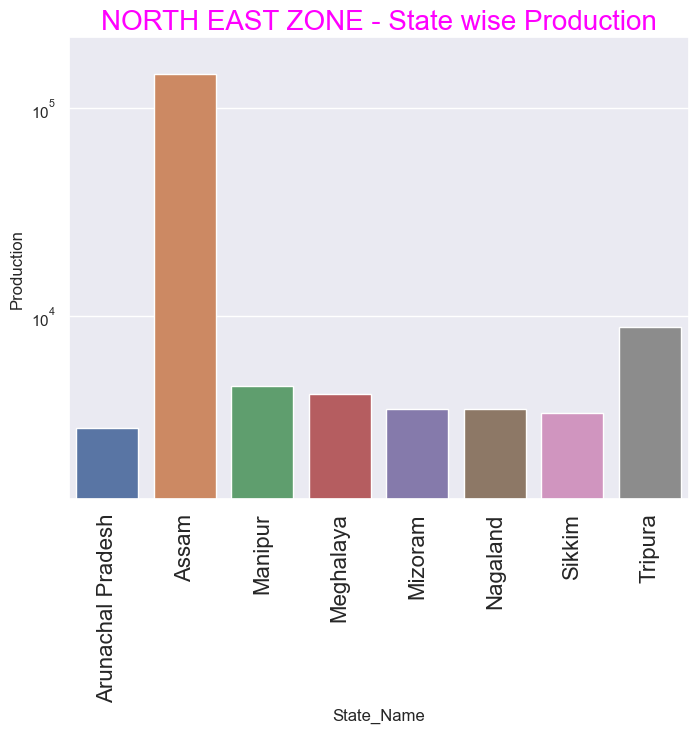

In [106]:
north_east_data = data[data['Zone']=='North East']

plt.figure(figsize=(8,6))
sns.barplot(x=north_east_data['State_Name'],y=north_east_data['Production'],errwidth=0)
plt.yscale('log')
plt.xticks(rotation=90,fontsize=16)
plt.title('NORTH EAST ZONE - State wise Production',fontsize=20,color='magenta')
plt.show()

Observation: <b>Assam</b> produces highest unit of crops in North East Zone.

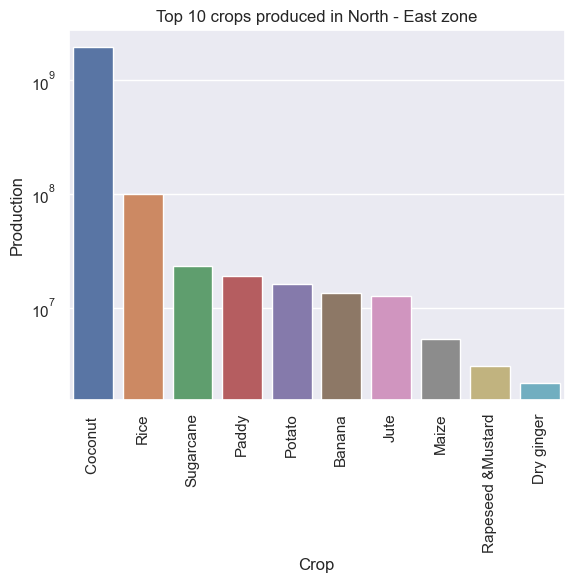

In [107]:
north_east_crop = north_east_data.groupby("Crop")["Production"].sum().reset_index().sort_values(by="Production",ascending=False).head(10)
sns.barplot(data=north_east_crop,x='Crop',y='Production')
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Top 10 crops produced in North - East zone")
plt.show()

Observation : <b>Coconut</b> is the highest producing crop in North East.

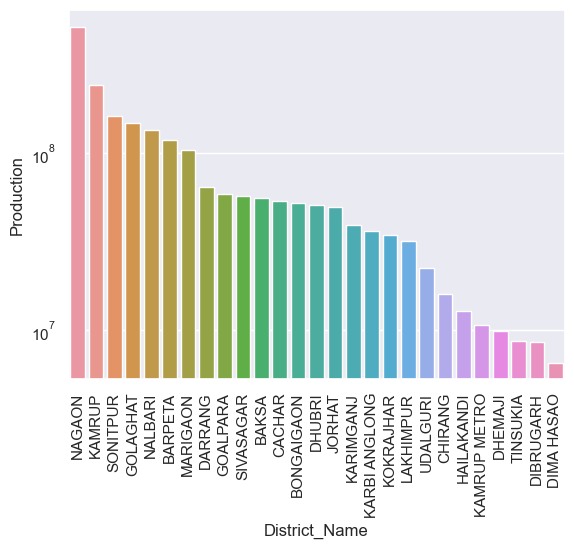

In [109]:

assam_district_group = north_east_data[north_east_data['State_Name']=='Assam'].groupby('District_Name')['Production'].sum().reset_index()

sns.barplot(assam_district_group.sort_values(by='Production',ascending=False),x='District_Name',y='Production')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

Observation: <b>Nagaon, Kamrup, Sonitpur, Golaghat</b> and <b>Nalbari</b> are the top 5 Districts in Assam with high production

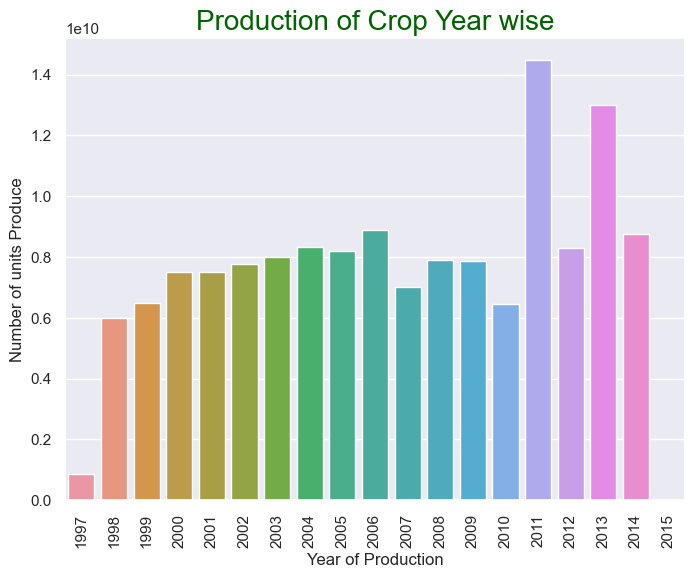

In [110]:

plt.figure(figsize=(8,6))
sns.barplot(data=data.groupby('Crop_Year')['Production'].sum().reset_index(),x='Crop_Year',y='Production')
plt.xticks(rotation=90)
plt.xlabel("Year of Production")
plt.ylabel("Number of units Produce")
plt.title("Production of Crop Year wise",color='darkgreen',fontsize=20)
plt.show()

Observation : <b>2011</b> has the highest Produce Units,followed by 2013<br><b>      1997</b> is the year with lowest Produce.

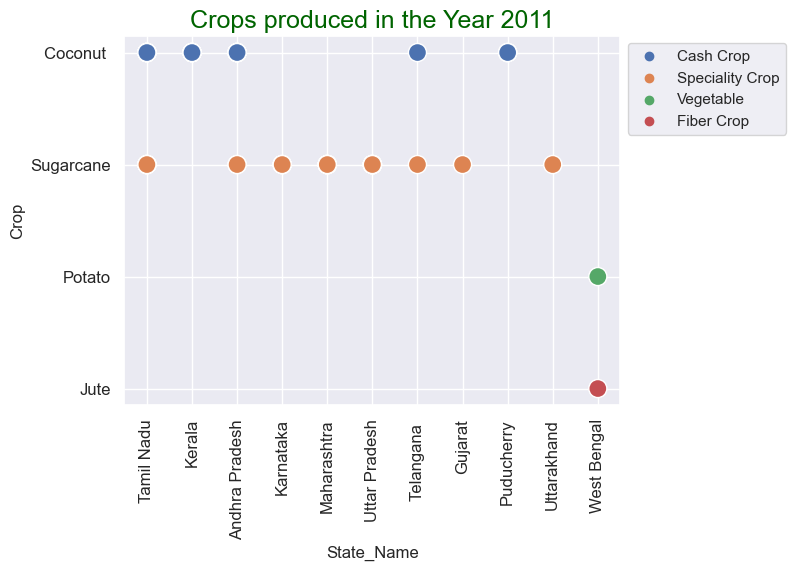

In [114]:
data_2011 = data[data['Crop_Year']==2011].sort_values(by='Production',ascending=False).reset_index()

sns.scatterplot(data_2011.head(100),x='State_Name',y='Crop',hue='Crop_Type',s=170)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title("Crops produced in the Year 2011",color='darkgreen',fontsize=18)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Observation: In <b>2011(highest producing Year)</b>, <b>Coconut</b> is the Highest producing Crop,followed by Sugarcane in the States- <b>Tamil Nadu,Kerala,Andhra Pradesh,Telangana and Puducherry</b>

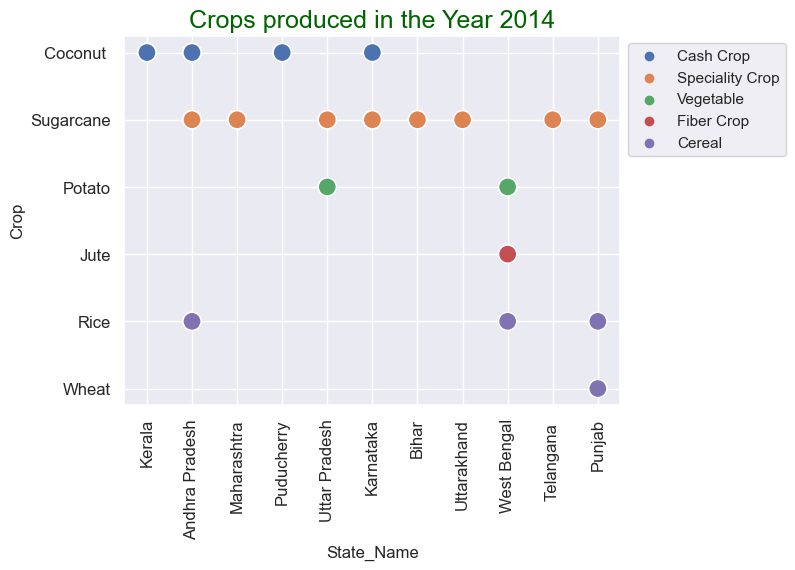

In [116]:
data_2014 = data[data['Crop_Year']==2014].sort_values(by='Production',ascending=False).reset_index()

sns.scatterplot(data_2014.head(100),x='State_Name',y='Crop',hue='Crop_Type',s=170)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.title("Crops produced in the Year 2014",color='darkgreen',fontsize=18)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Observation: In <b>2014 (second highest producing Year)</b>, <b>Coconut</b> is the Highest producing Crop,followed by Sugarcane in the States- <b>Kerala, Andhra Pradesh, Puducherry and Karnataka</b>

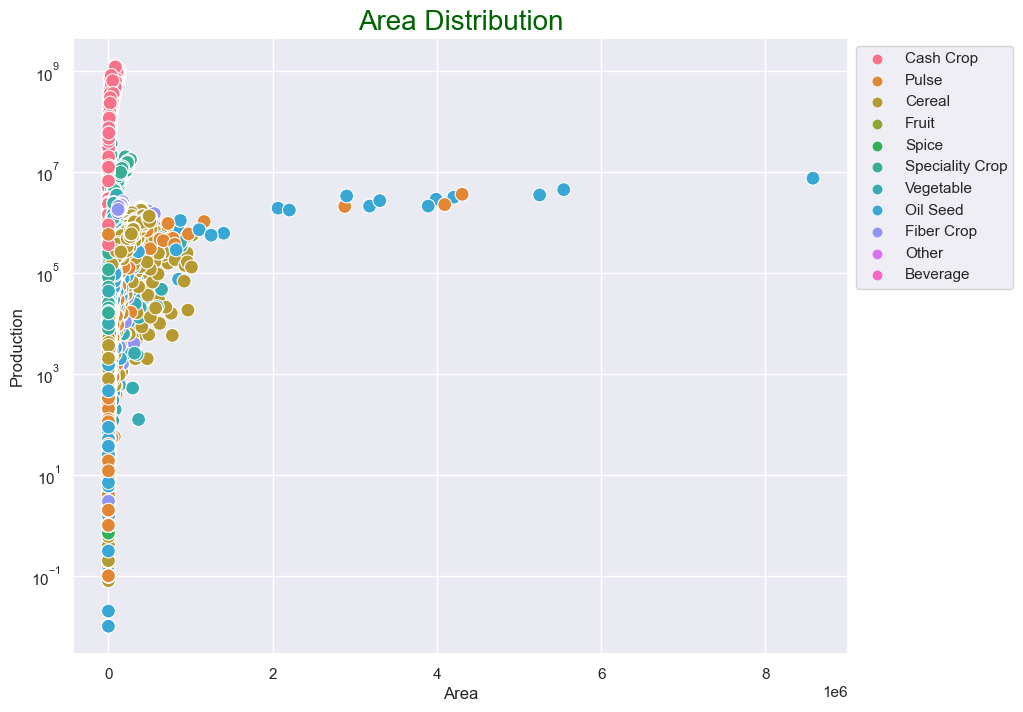

In [117]:
plt.figure(figsize=(10,8))
sns.scatterplot(data,x='Area',y='Production',s=100,hue='Crop_Type')
plt.title("Area Distribution",color='darkgreen',fontsize=20)
plt.yscale('log')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

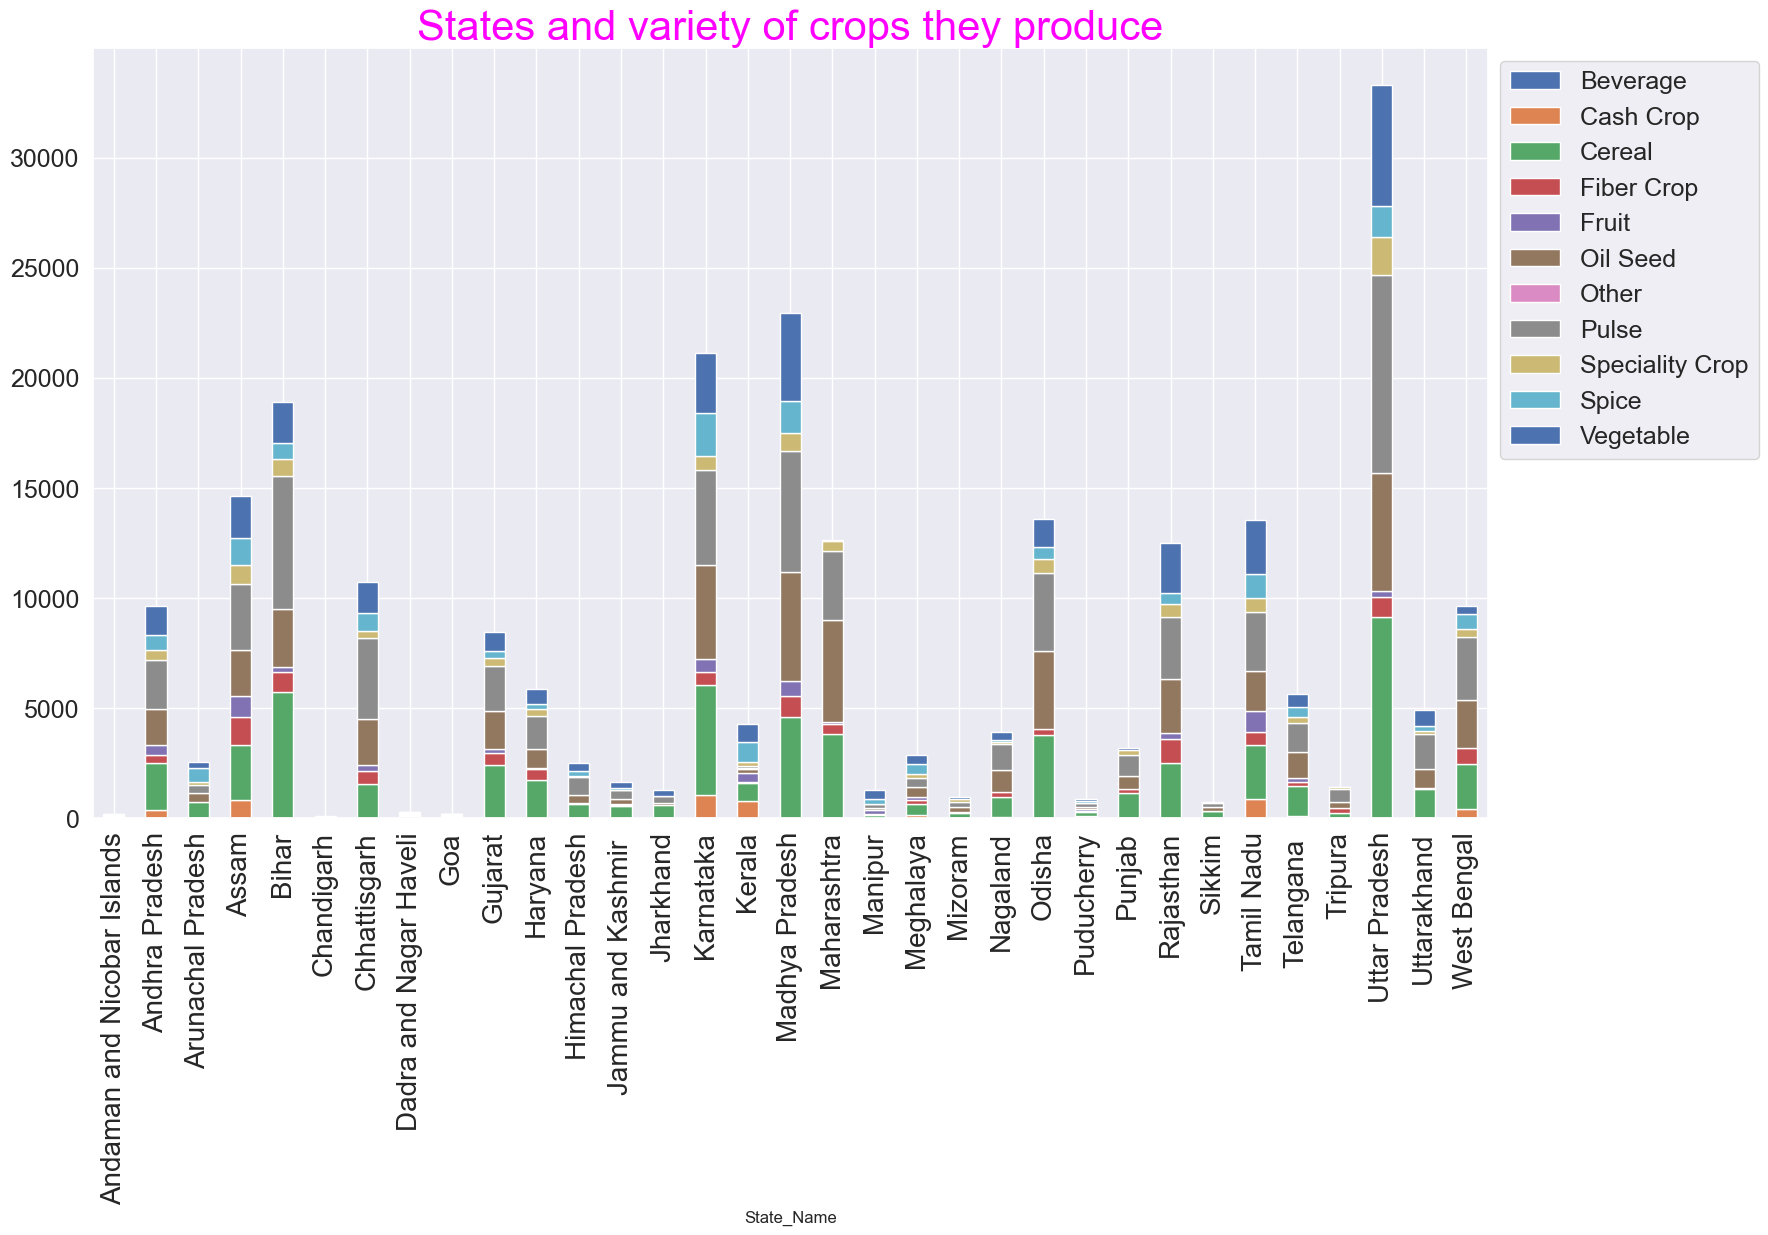

In [120]:
State_Crop_Type_cross = pd.crosstab(data['State_Name'],data['Crop_Type'])
State_Crop_Type_cross.plot(kind="bar",stacked=True,figsize=(18,10))
plt.legend(bbox_to_anchor=(1,1),fontsize=18)
plt.title("States and variety of crops they produce",color='magenta',fontsize=30)
plt.yticks(fontsize=18)
plt.xticks(fontsize=20)
plt.show()

Observation : <b>Uttar Pradesh</b> stands highest in producing variety of crops.

In [121]:
data_groupby_crop = data.groupby('Crop')['Production'].sum().reset_index()

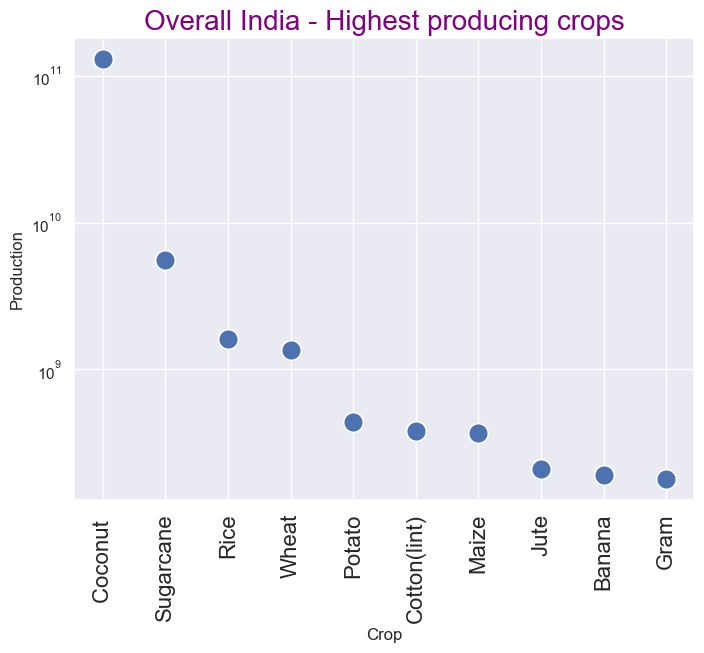

In [122]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=data_groupby_crop.sort_values(by='Production',ascending=False).reset_index().head(10),x='Crop',y='Production',s=200)
plt.xticks(rotation=90,fontsize=16)
plt.title("Overall India - Highest producing crops",fontsize=20,color='purple')
plt.yscale('log')
plt.show()

Observation: <b>Coconut, Sugarcane, Rice, Wheat and Potato</b> are the top 5 Crops which have high Production in India

In [123]:
data_groupby_crop = data.groupby('Crop')['Yield'].sum().reset_index()

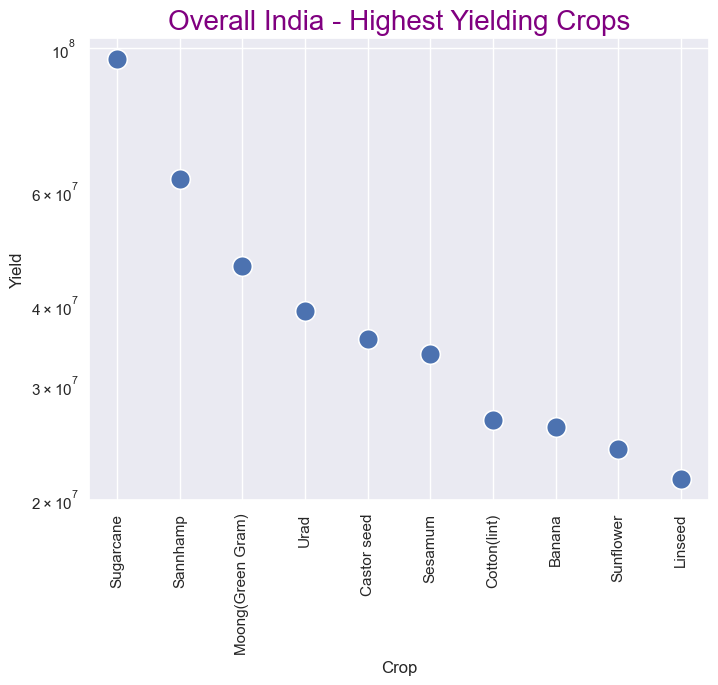

In [124]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data_groupby_crop.sort_values(by='Yield',ascending=False).reset_index().head(10),x='Crop',y='Yield',s=200)
plt.xticks(rotation=90)
plt.title("Overall India - Highest Yielding Crops",fontsize=20,color='purple')
plt.yscale('log')
plt.show()

Observation : <b>Sugarcane, Sannhamp,Moong(Green Gram),Urad and Castor Seed</b> are the top 5 highest Yielding crops in India.

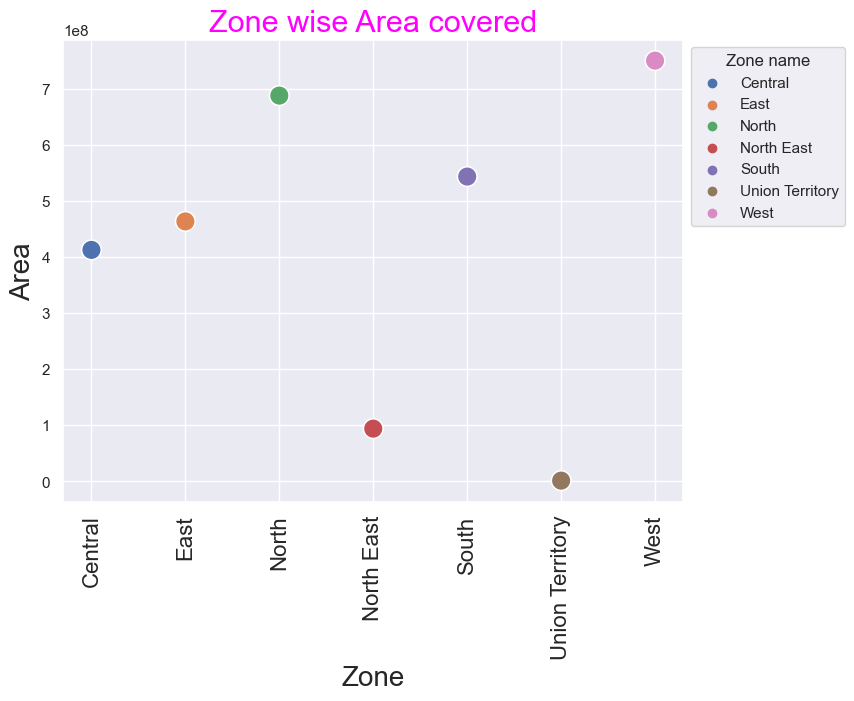

In [125]:

zone_by_area = data.groupby('Zone')['Area'].sum().reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(data=zone_by_area,x='Zone',y='Area',s=200,hue='Zone',palette='deep')
plt.xticks(rotation=90,fontsize=16)
plt.legend(title='Zone name',bbox_to_anchor=(1,1))
plt.title('Zone wise Area covered',color='magenta',fontsize=22)
plt.ylabel("Area",fontsize=20)
plt.xlabel("Zone",fontsize=20)
#plt.yscale('log')
plt.show()

Observation : <b>West Zone</b> covers the largest area followed by North and South Zone.

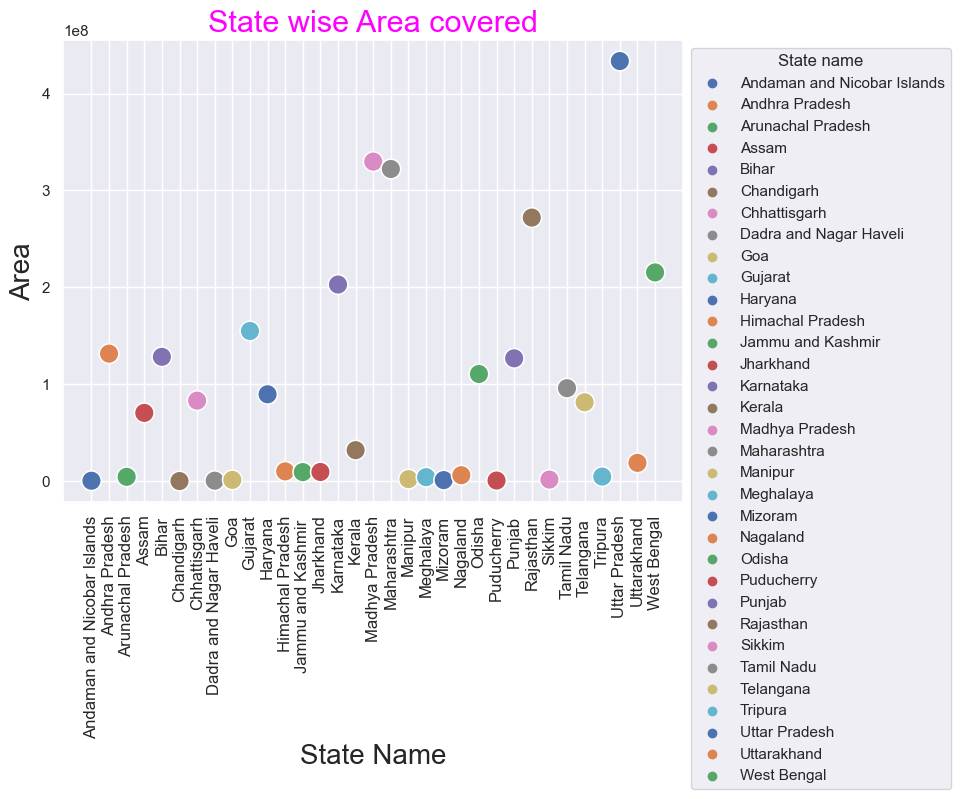

In [126]:

state_by_area = data.groupby('State_Name')['Area'].sum().reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(data=state_by_area,x='State_Name',y='Area',s=200,hue='State_Name',palette='deep')
plt.xticks(rotation=90,fontsize=12)
plt.legend(title='State name',bbox_to_anchor=(1,1))
plt.title('State wise Area covered',color='magenta',fontsize=22)
plt.ylabel("Area",fontsize=20)
plt.xlabel("State Name",fontsize=20)
#plt.yscale('log')
plt.show()

Observation : <b>Uttar Pradesh, Madhya Pradesh, Maharashtra, Rajasthan and West Bengal</b> covers the largest amount of Area State wise.

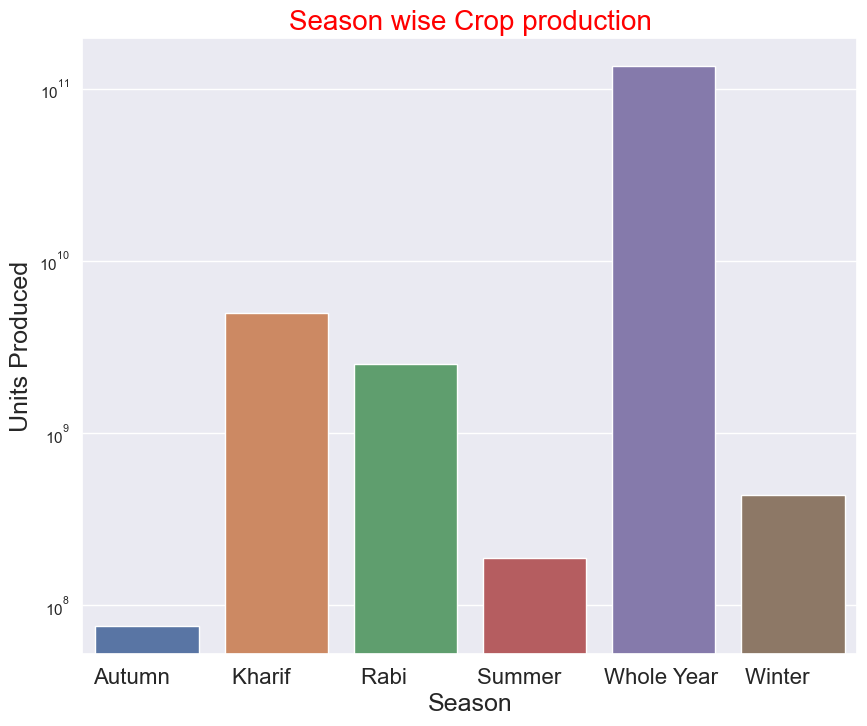

In [128]:
plt.figure(figsize=(10,8))
sns.barplot(data=data.groupby('Season')['Production'].sum().reset_index(),x='Season',y='Production')
plt.yscale('log')
plt.title('Season wise Crop production',fontsize=20,color='red')
plt.xticks(fontsize=16)
plt.ylabel("Units Produced",fontsize=18)
plt.xlabel("Season",fontsize=18)
plt.show()

Observation : Season wise, <b>Whole year</b> has the most producing units ,followed by <b>Kharif and Rabi</b>.

In [129]:
data['Crop'].value_counts()[0:5]

Crop
Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
Name: count, dtype: int64

Observation : <b>Rice</b> is grown in high Frequency in India.

In [135]:
rice_crop = data[data['Crop']=='Rice']

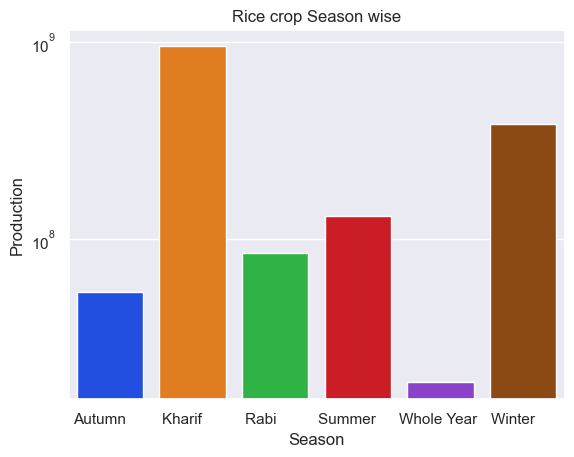

In [136]:
sns.barplot(rice_crop.groupby('Season')['Production'].sum().reset_index(),x='Season',y='Production',palette='bright')
plt.yscale('log')
plt.title("Rice crop Season wise")
plt.show()

Observation : <b>Kharif and Winter</b> are the seasons when rice in highly produced.

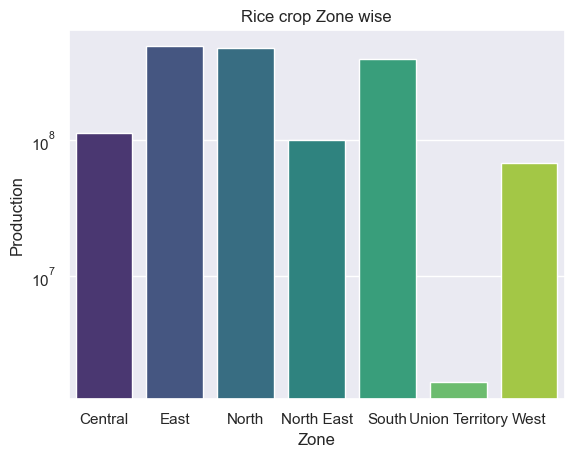

In [138]:
sns.barplot(rice_crop.groupby('Zone')['Production'].sum().reset_index(),x='Zone',y='Production',palette='viridis')
plt.yscale('log')
plt.title("Rice crop Zone wise")
plt.show()

Observation : East, North and South Zone produce the largest amount of Rice crop.

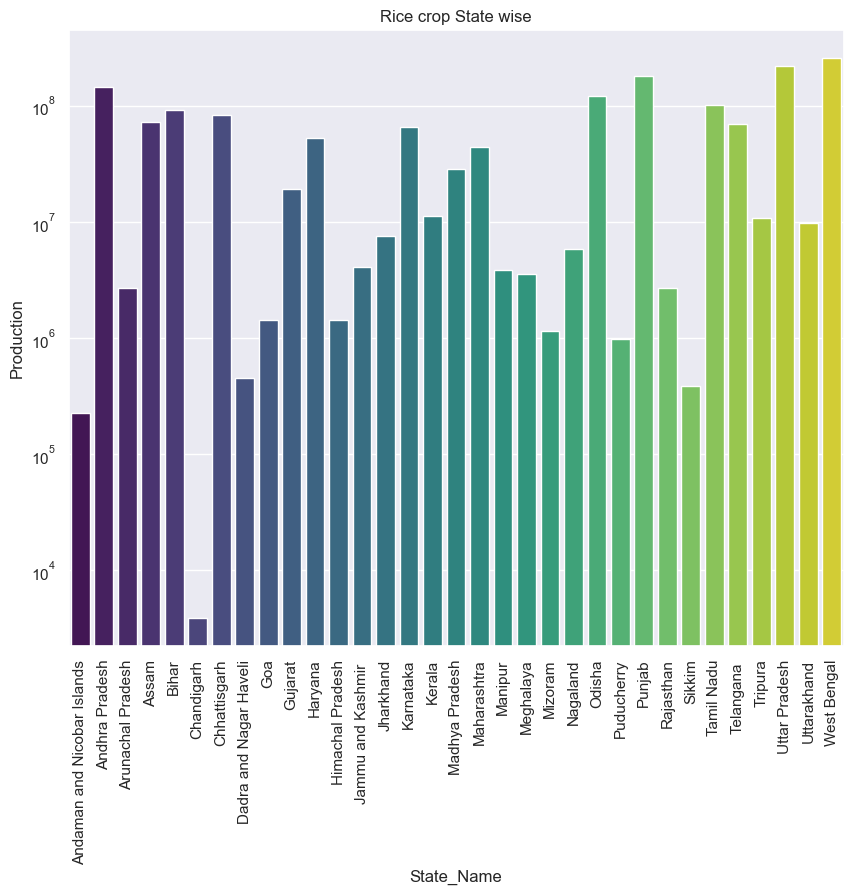

In [143]:
plt.figure(figsize=(10,8))
sns.barplot(rice_crop.groupby('State_Name')['Production'].sum().reset_index(),x='State_Name',y='Production',palette='viridis')
plt.yscale('log')
plt.title("Rice crop State wise")
plt.xticks(rotation=90)
plt.show()

Observation : <b>West Bengal, Uttar Pradesh, Punjab, Andhra Pradesh and Odisha</b> are the top 5 States producing large amounts of Rice Crop.

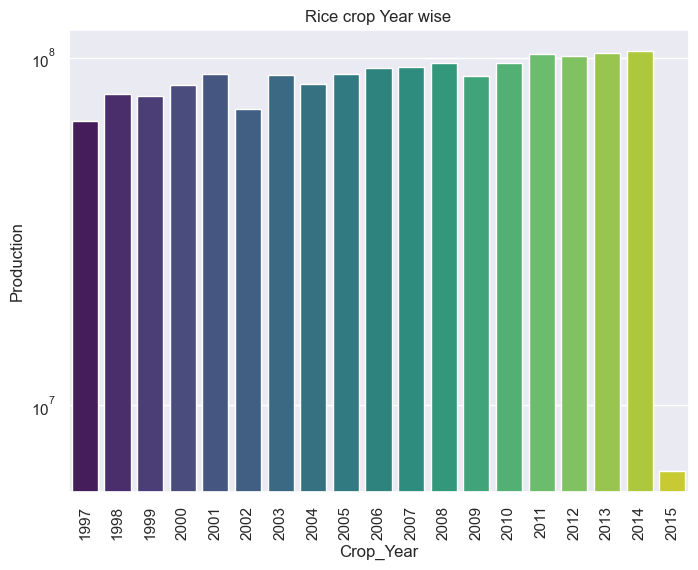

In [146]:
plt.figure(figsize=(8,6))
sns.barplot(rice_crop.groupby('Crop_Year')['Production'].sum().reset_index(),x='Crop_Year',y='Production',palette='viridis')
plt.yscale('log')
plt.title("Rice crop Year wise")
plt.xticks(rotation=90)
plt.show()

In [155]:
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield,Zone,Crop_Type
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896,Union Territory,Cash Crop
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000,Union Territory,Pulse
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059,Union Territory,Cereal
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045,Union Territory,Fruit
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167,Union Territory,Cash Crop


In [156]:
final_crop_data = data.to_excel('Final_Crop_Data.xlsx')

In [174]:
data.columns.values

array(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Area', 'Production', 'Yield', 'Zone', 'Crop_Type'], dtype=object)

# Results

Cash Crops are highly produced in India,followed by speciality crops

South Zone stands highest in production and Union Territory stands seconf highest
Kerela is the state with highest production of crops,followed by Andhra Pradesh
Kozhikode, Malappuram, Thiruvananthapuram are the top 3 high producing District in Kerela
Coconut is the largest producing crop in South Zone

Andaman and Nicobar Islands have highest production in Union Territory,followed by Puducherry
Coconut is the largest producing crop in Union Territory.
Nicobars,South Andamans and North and Middle Andaman are the top Districts in Andaman and Nicobar which have high Crop Production.

Haryana and Punjab are the state that produce highest units of crops in North Zone.
Sugarcane, Wheat and Rice are the top 3 crops produced in North Zone

Goa produces highest unit of crops in West Zone.
Sugarcane and Coconut are the crops that are highly produced in West Zone.

West Bengal produces highest unit of crops in East Zone.
Coconut and Rice are the top crops produced in East Zone.

Madhya Pradesh and Chhattisgarh produce almost same amount of crops in Central Zone.
Wheat, Rice and Soyabean are the top 3 crops produced in Central Zone.

Assam produces highest unit of crops in North East Zone.
 Nagaon, Kamrup, Sonitpur, Golaghat and Nalbari are the top 5 Districts in Assam with high production
Coconut is the highest producing crop in North East.

 2011 has the highest Produce Units,followed by 2013
1997 is the year with lowest Produce.

In 2011(highest producing Year), Coconut is the Highest producing Crop,followed by Sugarcane in the States- Tamil Nadu,Kerala,Andhra Pradesh,Telangana and Puducherry

In 2014 (second highest producing Year), Coconut is the Highest producing Crop,followed by Sugarcane in the States- Kerala, Andhra Pradesh, Puducherry and Karnataka

Uttar Pradesh stands highest in producing variety of crops.

Coconut, Sugarcane, Rice, Wheat and Potato are the top 5 Crops which have high Production in India.
Sugarcane, Sannhamp,Moong(Green Gram),Urad and Castor Seed are the top 5 highest Yielding crops in India.

West Zone covers the largest area followed by North and South Zone.

Uttar Pradesh, Madhya Pradesh, Maharashtra, Rajasthan and West Bengal covers the largest amount of Area State wise.

Season wise, Whole year has the most producing units ,followed by Kharif and Rabi.

Rice is grown in high Frequency in India.
East, North and South Zone produce the largest amount of Rice crop.
West Bengal, Uttar Pradesh, Punjab, Andhra Pradesh and Odisha are the top 5 States producing large amounts of Rice Crop.
Rice Crop production is almost equal in all the years.

# Applying Algorithm 

In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [161]:
final_crop_data = data[['Crop_Year', 'Season', 'Crop','Area', 'Production']]

In [162]:
label_encoder = LabelEncoder()

In [163]:
final_crop_data['Season'] = label_encoder.fit_transform(final_crop_data['Season'])
final_crop_data['Crop'] = label_encoder.fit_transform(final_crop_data['Crop'])

In [166]:
x = final_crop_data[['Crop_Year', 'Season', 'Crop', 'Area']]
y = final_crop_data['Production']

In [176]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=26)

,Crop_Year,Season,Crop,Area
69117,2005,1,95,8623.0
180530,1997,4,63,527.0
141388,2008,4,109,1140.0
131709,2011,1,116,2000.0
169332,2004,1,3,699.0
...,...,...,...,...
60998,2007,2,119,30200.0
238381,2008,1,49,10832.0
32440,2013,3,63,1303.0
206238,2011,3,116,7.0


In [168]:
model = RandomForestRegressor(n_estimators=100, random_state=26)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=26)

In [169]:
y_predict = model.predict(x_test)

In [171]:
mse = mean_squared_error(y_test, y_predict)
print(f'Mean Squared Error = {mse}')

Mean Squared Error = 61888361085819.24


In [172]:
feature_importances = model.feature_importances_
print('Feature Importances:', feature_importances)

Feature Importances: [1.14857728e-01 1.55365820e-05 6.10155560e-01 2.74971175e-01]


In [175]:
final_crop_data
# using random data  from the dataset itself to predict 

,Crop_Year,Season,Crop,Area,Production
0,2000,1,2,1254.0,2000.0
1,2000,1,74,2.0,1.0
2,2000,1,95,102.0,321.0
3,2000,4,7,176.0,641.0
4,2000,4,22,720.0,165.0
...,...,...,...,...,...
246086,2014,3,95,306.0,801.0
246087,2014,3,102,627.0,463.0
246088,2014,4,106,324.0,16250.0
246089,2014,5,95,279151.0,597899.0


In [179]:
model.predict([[2014,3,95,306.0]])

array([920.28])